In [222]:
from bertopic import BERTopic
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import spacy
import string

In [118]:
data = pd.read_csv('../data/processed/toxicity_analysis_perspective.csv')
docs = data['full_text'].tolist()
toxicity_scores = data['toxicity'].tolist()

In [89]:
data.groupby('search_tag')['toxicity'].describe()

,count,mean,std,min,25%,50%,75%,max
search_tag,,,,,,,,
biden2020,416.0,0.321675,0.220507,0.018598,0.150237,0.282565,0.451369,0.950486
democrats,83.0,0.302863,0.213268,0.024143,0.154903,0.254629,0.377512,0.892411
joebiden,77.0,0.287763,0.196720,0.023671,0.114090,0.254629,0.426917,0.788558
maga,195.0,0.336119,0.214232,0.015456,0.159602,0.319637,0.478295,0.944597
trump,185.0,0.341684,0.222187,0.016462,0.189342,0.294055,0.426917,0.916254
trump2020,196.0,0.345719,0.230809,0.022257,0.153660,0.297711,0.490022,0.928801


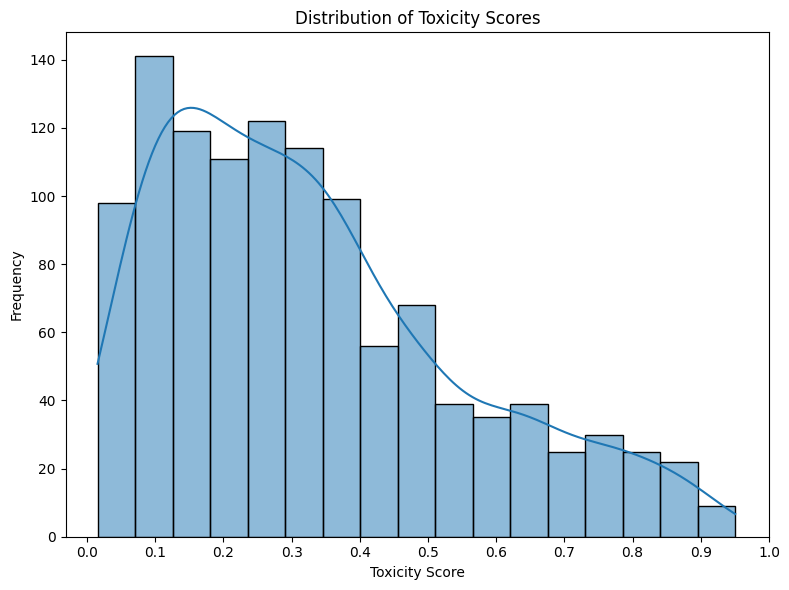

In [100]:
# Set font size
plt.rcParams.update({'font.size': 10})

# Create a larger figure
plt.figure(figsize=(8, 6))

# Create a histogram
sns.histplot(data['toxicity'], kde=True)

plt.xlabel('Toxicity Score')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Frequency')
plt.title('Distribution of Toxicity Scores')
plt.tight_layout()
plt.show()

In [3]:
docs[0]

"so the former vice president and i are best buds now #joebiden #foryoupage do you know what dab me up is? do you know what dab me up is? okay, so you have to go like that. that's how you dab me up. dab me up! woo! the way we do it in my neighborhood, we go like this. you walk up, you go like this. oh, can we do that? no, no, let's do it. you go this, this. no, no, keep it even. you're too old. this, this, and then this. this, okay, okay. then this. you got it? i got it. good to see you. good to see you too. "

In [5]:
random.seed(42) # for reproducability

In [6]:
from bertopic import BERTopic

topic_model = BERTopic(
    nr_topics="auto",
    embedding_model="all-MiniLM-L6-v2", # best model for general purposes
    verbose=True
)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

2023-07-05 09:37:20,220 - BERTopic - Transformed documents to Embeddings
2023-07-05 09:37:28,639 - BERTopic - Reduced dimensionality
2023-07-05 09:37:28,675 - BERTopic - Clustered reduced embeddings
2023-07-05 09:37:29,011 - BERTopic - Reduced number of topics from 14 to 14


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 3), stop_words="english")
topic_model.update_topics(docs, topics, vectorizer_model=cv)

# topic_model.update_topics(docs, topics, n_gram_range=(1, 3))

In [223]:
topic_model.save("../data/models/BERTopic_Model", serialization="pytorch", save_ctfidf=True, save_embedding_model="sentence-transformers/all-MiniLM-L6-v2")

In [224]:
loaded_model = BERTopic.load("../data/models/BERTopic_Model/")

In [8]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,478,-1_trump_like_don_just,"[trump, like, don, just, know, biden, fyp, tru...",[#omegle #biden2020 #election #trump2020 #for...
1,0,168,0_biden_biden2020_vote_joe,"[biden, biden2020, vote, joe, trump, fyp, joe ...",[joe biden has had some creepy moments wit wom...
2,1,113,1_black_people_white_racist,"[black, people, white, racist, black people, l...",[#blm #blacklivesmatter #blacklivesstillmatter...
3,2,77,2_election_biden_trump_vote,"[election, biden, trump, vote, won, just, vote...",[is this year’s election doomed??? #trump2020 ...
4,3,73,3_trump_maga_fyp_trump2020,"[trump, maga, fyp, trump2020, oof, oof oof, oo...",[hahahahaha @therepublicanhypehouse @the.teen....
5,4,72,4_trump_people_like_donald trump,"[trump, people, like, donald trump, donald, ta...","[ okay, so this might be rough, but questions ..."
6,5,28,5_cc_gay_trump_support,"[cc, gay, trump, support, said, know, don, lov...","[bc i promise, your own medicine don’t taste t..."
7,6,27,6_like_charlie_poo_oh,"[like, charlie, poo, oh, know, okay, lewis, go...",[when ur wires r tangled😭 #biden2020 #blue #de...
8,7,27,7_covid_coronavirus_trump_pandemic,"[covid, coronavirus, trump, pandemic, cases, v...",[part 2 of #republicansforbiden ad #dumptrump ...
9,8,23,8_greenscreen_trump_greenscreenvideo_biden,"[greenscreen, trump, greenscreenvideo, biden, ...",[i might make more parts #greenscreen #trump2...


In [9]:
# Generate labels
topic_labels = topic_model.generate_topic_labels(nr_words=3, topic_prefix=False, word_length=15, separator=" - ")
topic_model.set_topic_labels(topic_labels)

In [10]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,478,-1_trump_like_don_just,trump - like - don,"[trump, like, don, just, know, biden, fyp, tru...",[#omegle #biden2020 #election #trump2020 #for...
1,0,168,0_biden_biden2020_vote_joe,biden - biden2020 - vote,"[biden, biden2020, vote, joe, trump, fyp, joe ...",[joe biden has had some creepy moments wit wom...
2,1,113,1_black_people_white_racist,black - people - white,"[black, people, white, racist, black people, l...",[#blm #blacklivesmatter #blacklivesstillmatter...
3,2,77,2_election_biden_trump_vote,election - biden - trump,"[election, biden, trump, vote, won, just, vote...",[is this year’s election doomed??? #trump2020 ...
4,3,73,3_trump_maga_fyp_trump2020,trump - maga - fyp,"[trump, maga, fyp, trump2020, oof, oof oof, oo...",[hahahahaha @therepublicanhypehouse @the.teen....
5,4,72,4_trump_people_like_donald trump,trump - people - like,"[trump, people, like, donald trump, donald, ta...","[ okay, so this might be rough, but questions ..."
6,5,28,5_cc_gay_trump_support,cc - gay - trump,"[cc, gay, trump, support, said, know, don, lov...","[bc i promise, your own medicine don’t taste t..."
7,6,27,6_like_charlie_poo_oh,like - charlie - poo,"[like, charlie, poo, oh, know, okay, lewis, go...",[when ur wires r tangled😭 #biden2020 #blue #de...
8,7,27,7_covid_coronavirus_trump_pandemic,covid - coronavirus - trump,"[covid, coronavirus, trump, pandemic, cases, v...",[part 2 of #republicansforbiden ad #dumptrump ...
9,8,23,8_greenscreen_trump_greenscreenvideo_biden,greenscreen - trump - greenscreenvide,"[greenscreen, trump, greenscreenvideo, biden, ...",[i might make more parts #greenscreen #trump2...


In [39]:
topic_model.get_representative_docs(12)

["biden has proved time again he’s a liar and forgetful of what he even says #america #debate #joebiden #trump #trump2020 #american #fyp #foryou let me allow vice president biden to respond. i have never said i oppose fracking. you said it on tape. i did. show the tape. put it on your website. i'll put it on. put it on the website. the fact of the matter is, he's flat lying. would you rule out banning? would there be any place for fossil fuels, including coal and fracking, in a biden administration? no, we would work it out. we would make sure it's eliminated and no more subsidies for either one of those. who’s the one lying?? ok joe, heres the tape ",
 "this isn’t political unless u: dont care abt the #earth #animals #oceans/anything but urself❤️ #fyp #foryou #science #edutok #education #nature #trump three major things that have happened to our environment because of our president. number one, he re-permitted the use of seismic air guns when it comes to offshore drilling. and what th

In [57]:
# Set custom labels based on revision of representative documents
topic_labels = {
    -1: "Outliers", 
    0: "Joe Biden's Behavior",
    1: "Discussions on Race and Politics",
    2: "Post-Election Uncertainty and Political Divide",
    3: "Pro-Trump Social Media Posts and Reactions",
    4: "Criticism and Defense of Trump and Biden Supporters",
    5: "Fictional and Real Personal Experiences",
    6: "Miscellaneous TikTok videos",
    7: "Criticism of Trumps Handling of the Corona Virus",
    8: "Companies that Donated to Political Candidates",
    9: "Discussions Around Wearing Face Masks",
    10: "Commentary on Trumps Family",
    11: "Trump and Biden Related Products and Merchandise",
    12: "Climate Change and Environmental Policies"
    }
topic_model.set_topic_labels(topic_labels)

In [58]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,478,-1_trump_like_don_just,Outliers,"[trump, like, don, just, know, biden, fyp, tru...",[#omegle #biden2020 #election #trump2020 #for...
1,0,168,0_biden_biden2020_vote_joe,Joe Biden's Behavior,"[biden, biden2020, vote, joe, trump, fyp, joe ...",[joe biden has had some creepy moments wit wom...
2,1,113,1_black_people_white_racist,Discussions on Race and Politics,"[black, people, white, racist, black people, l...",[#blm #blacklivesmatter #blacklivesstillmatter...
3,2,77,2_election_biden_trump_vote,Post-Election Uncertainty and Political Divide,"[election, biden, trump, vote, won, just, vote...",[is this year’s election doomed??? #trump2020 ...
4,3,73,3_trump_maga_fyp_trump2020,Pro-Trump Social Media Posts and Reactions,"[trump, maga, fyp, trump2020, oof, oof oof, oo...",[hahahahaha @therepublicanhypehouse @the.teen....
5,4,72,4_trump_people_like_donald trump,Criticism and Defense of Trump and Biden Suppo...,"[trump, people, like, donald trump, donald, ta...","[ okay, so this might be rough, but questions ..."
6,5,28,5_cc_gay_trump_support,Fictional and Real Personal Experiences,"[cc, gay, trump, support, said, know, don, lov...","[bc i promise, your own medicine don’t taste t..."
7,6,27,6_like_charlie_poo_oh,Miscellaneous TikTok videos,"[like, charlie, poo, oh, know, okay, lewis, go...",[when ur wires r tangled😭 #biden2020 #blue #de...
8,7,27,7_covid_coronavirus_trump_pandemic,Criticism of Trumps Handling of the Corona Virus,"[covid, coronavirus, trump, pandemic, cases, v...",[part 2 of #republicansforbiden ad #dumptrump ...
9,8,23,8_greenscreen_trump_greenscreenvideo_biden,Companies that Donated to Political Candidates,"[greenscreen, trump, greenscreenvideo, biden, ...",[i might make more parts #greenscreen #trump2...


In [61]:
# Datframe of topics and toxicity scores
topic_data = pd.DataFrame({'Topic': topics, 'Toxicity Score': toxicity_scores})

,Topic,Toxicity Score
0,-1,0.323975
1,3,0.421296
2,-1,0.091913
3,-1,0.023435
4,3,0.397214
...,...,...
1147,-1,0.469820
1148,1,0.314093
1149,0,0.065797
1150,-1,0.326092


In [59]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
sid = SentimentIntensityAnalyzer()

sentiment_scores = []

for text in data['full_text']:
    sentiment_scores.append(sid.polarity_scores(text)['compound'])

topic_data['Sentiment Score'] = sentiment_scores

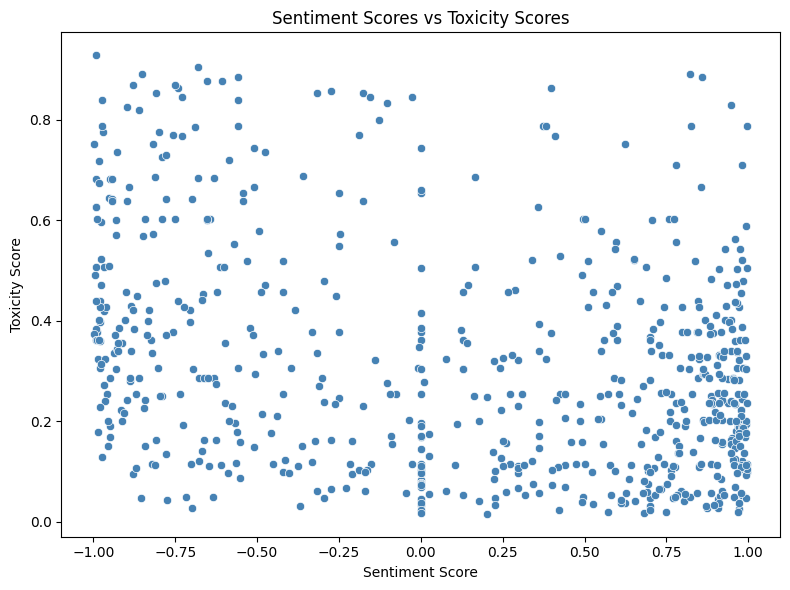

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set font size
plt.rcParams.update({'font.size': 10})

# Create a larger figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with minimalistic style
scatter_plot = sns.scatterplot(data=topic_data, x='Sentiment Score', y='Toxicity Score', color='steelblue')

plt.xlabel('Sentiment Score')
plt.ylabel('Toxicity Score')
plt.title('Sentiment Scores vs Toxicity Scores')

plt.tight_layout()
plt.show()

In [63]:
topic_data = topic_data[topic_data["Topic"] != -1]

topic_data

,Topic,Toxicity Score,Sentiment Score
1,3,0.421296,-0.8290
4,3,0.397214,-0.7041
5,4,0.285484,0.8481
6,0,0.205721,0.4404
7,6,0.179840,0.9638
...,...,...,...
1143,11,0.043647,0.6124
1144,7,0.126940,0.2457
1146,1,0.338998,0.9665
1148,1,0.314093,-0.9764


In [154]:
topic_data['text'] = data['full_text'].copy()

In [155]:
topic_data.head(4)

,Topic,Toxicity Score,Sentiment Score,text
1,3,0.421296,-0.8290,“your organization is terrible” #maga #fyp go ...
4,3,0.397214,-0.7041,#trump2020 #foryourpage #maga #maga #kag what?...
5,4,0.285484,0.8481,show your support #donaldtump #trump #maga #20...
6,0,0.205721,0.4404,#itsshowtime #borntoglow #politics #voteblue #...


In [184]:
nlp = spacy.load("en_core_web_sm")

custom_stopwords = ["fyp", "foryoupage", "foryourpage", "foryou", "joebiden", "biden2020", "trump", "trump2020", "maga", "democrats"]

def preprocess_text(text):
    doc = nlp(text)
    processed_text = " ".join(token.lemma_ for token in doc if not token.is_stop and token.text.lower() not in custom_stopwords)
    return processed_text

filtered_data = topic_data[(topic_data['Topic'].isin([0, 1, 3, 8])) & (topic_data['Toxicity Score'] >= 0.7)]

filtered_data['processed_text'] = filtered_data['text'].apply(preprocess_text)

word_freq = {}
for topic in filtered_data['Topic'].unique():
    topic_text = " ".join(filtered_data[filtered_data['Topic'] == topic]['processed_text'])
    for word in topic_text.split():
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

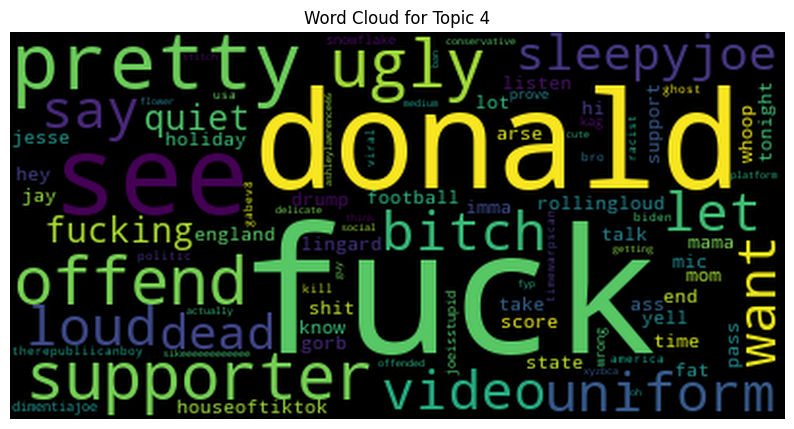

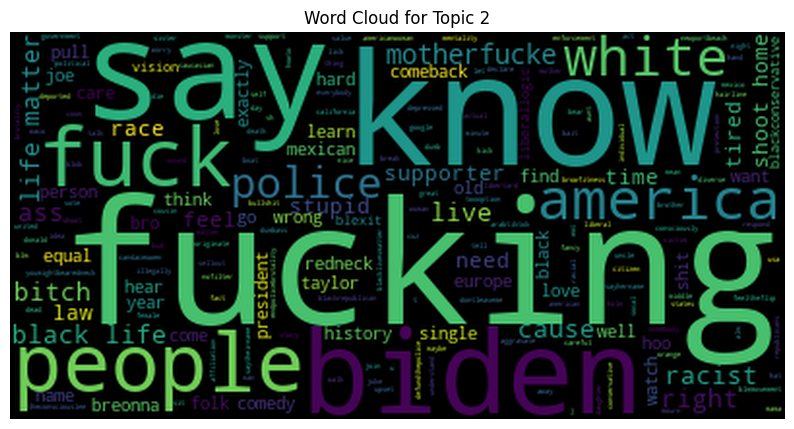

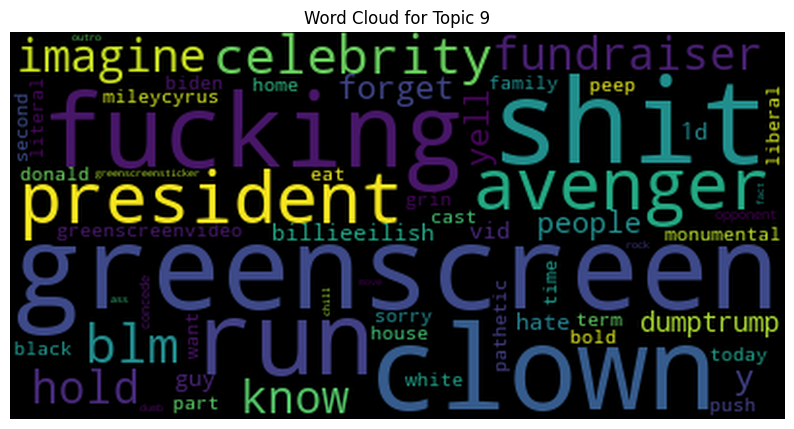

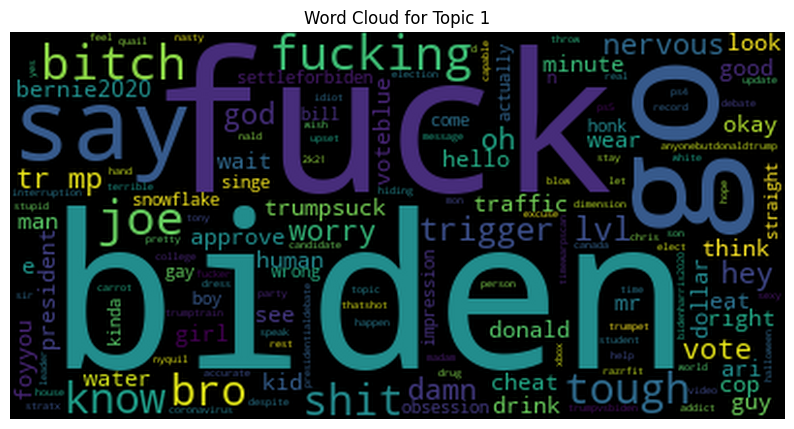

In [185]:
topics = filtered_data['Topic'].unique()
for topic in topics:
    topic_text = " ".join(filtered_data[filtered_data['Topic'] == topic]['processed_text'])
    wordcloud = WordCloud().generate(topic_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic + 1}")
    plt.show()

In [187]:
nlp = spacy.load("en_core_web_sm")

custom_stopwords = ["fyp", "foryoupage", "foryourpage", "foryou", "joebiden", "biden2020", "trump", "trump2020", "maga", "democrats"]

def preprocess_text(text):
    doc = nlp(text)
    processed_text = " ".join(token.lemma_ for token in doc if not token.is_stop and token.text.lower() not in custom_stopwords)
    return processed_text

topics = topic_data['Topic'].unique()  # Preprocess for all topics

for topic in topics:
    topic_data_topic = topic_data[(topic_data['Topic'] == topic) & (topic_data['Toxicity Score'] >= 0.7)]
    topic_text = " ".join(topic_data_topic['text'])
    processed_text = preprocess_text(topic_text)
    word_freq = {}
    for word in processed_text.split():
        if word not in word_freq and word.isalpha():  # Exclude non-alphabetic words
            word_freq[word] = 1
        elif word.isalpha():
            word_freq[word] += 1
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:8]
    print(f"Topic {topic + 1}:")
    for word, freq in top_words:
        print(f"- {word}: {freq} occurrences")
    print()

Topic 4:
- fuck: 9 occurrences
- donald: 5 occurrences
- see: 3 occurrences
- pretty: 3 occurrences
- supporter: 3 occurrences
- offend: 3 occurrences
- ugly: 3 occurrences
- video: 2 occurrences

Topic 5:
- yeah: 5 occurrences
- baby: 4 occurrences
- relative: 4 occurrences
- share: 4 occurrences
- donald: 3 occurrences
- vote: 3 occurrences
- money: 3 occurrences
- dad: 3 occurrences

Topic 1:
- biden: 12 occurrences
- fuck: 10 occurrences
- like: 9 occurrences
- go: 6 occurrences
- say: 5 occurrences
- fucking: 5 occurrences
- joe: 5 occurrences
- bitch: 5 occurrences

Topic 7:
- fucking: 10 occurrences
- subaru: 6 occurrences
- oh: 6 occurrences
- like: 5 occurrences
- okay: 4 occurrences
- love: 4 occurrences
- foot: 3 occurrences
- pull: 3 occurrences

Topic 2:
- fucking: 16 occurrences
- like: 14 occurrences
- know: 13 occurrences
- say: 10 occurrences
- biden: 7 occurrences
- people: 6 occurrences
- fuck: 6 occurrences
- america: 6 occurrences

Topic 11:

Topic 12:

Topic 13:



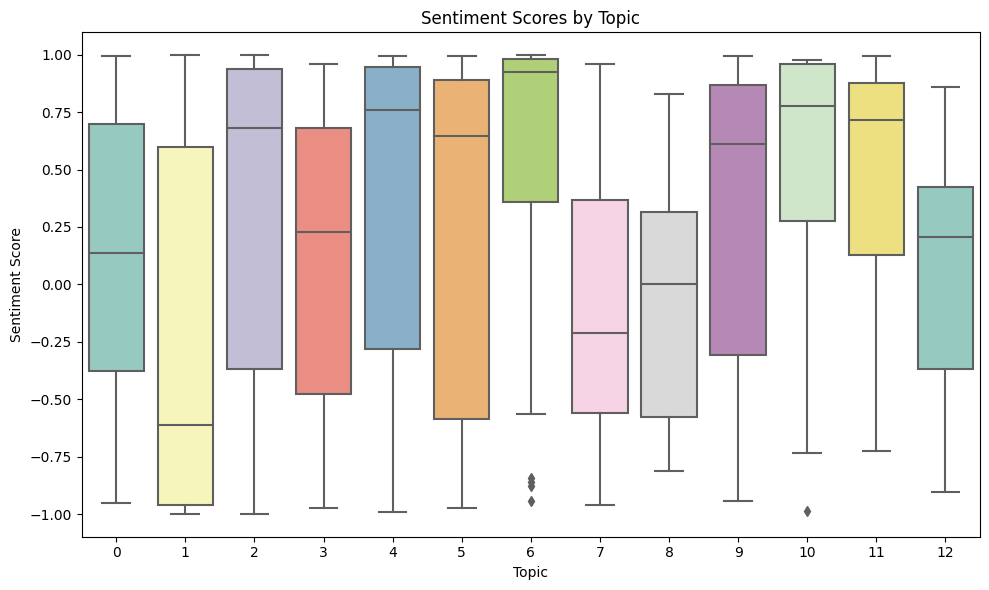

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=topic_data, x='Topic', y='Sentiment Score', palette='Set3')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Topic')
plt.xticks()  # Hide x-axis labels
plt.tight_layout()
plt.show()


In [79]:
topic_data.groupby('Topic')['Sentiment Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Topic,,,,,,,,
0,168.0,0.142637,0.593450,-0.9501,-0.376000,0.13545,0.698750,0.9940
1,113.0,-0.223336,0.785979,-0.9983,-0.960800,-0.61240,0.600100,0.9968
2,77.0,0.315619,0.731987,-0.9982,-0.369100,0.67970,0.937300,0.9969
3,73.0,0.119192,0.611842,-0.9747,-0.476700,0.22630,0.680800,0.9575
4,72.0,0.339340,0.737598,-0.9913,-0.282525,0.75750,0.947775,0.9929
5,28.0,0.280846,0.740717,-0.9726,-0.586000,0.64715,0.890950,0.9935
6,27.0,0.509011,0.705496,-0.9435,0.358450,0.92570,0.980150,0.9973
7,27.0,-0.063648,0.637039,-0.9591,-0.558550,-0.21150,0.368450,0.9584
8,23.0,-0.097226,0.527870,-0.8126,-0.578400,0.00000,0.313800,0.8306


In [15]:
topic_data.groupby('Topic')['Toxicity Score'].mean()

Topic
0     0.267540
1     0.426939
2     0.229722
3     0.310898
4     0.254273
5     0.449100
6     0.353196
7     0.248215
8     0.384193
9     0.381049
10    0.367051
11    0.158762
12    0.284661
Name: Toxicity Score, dtype: float64

In [114]:
topic_data.groupby('Topic')['Toxicity Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Topic,,,,,,,,
0,168.0,0.267540,0.248171,0.018598,0.094021,0.157944,0.404035,0.906106
1,113.0,0.426939,0.165257,0.113677,0.323975,0.377512,0.507592,0.928801
2,77.0,0.229722,0.167502,0.016462,0.107833,0.181741,0.329195,0.751094
3,73.0,0.310898,0.245317,0.016587,0.100457,0.254629,0.457515,0.885998
4,72.0,0.254273,0.165888,0.015456,0.152155,0.217762,0.333545,0.829959
5,28.0,0.449100,0.212786,0.125204,0.278904,0.430755,0.602600,0.853334
6,27.0,0.353196,0.176954,0.057501,0.238589,0.338998,0.432059,0.788558
7,27.0,0.248215,0.158727,0.047605,0.145061,0.234514,0.312455,0.825221
8,23.0,0.384193,0.300390,0.032628,0.137353,0.274129,0.708590,0.862967


In [ ]:
topic_labels = {
    0: "Joe Biden's Behavior",
    1: "Discussions on Race and Politics",
    2: "Post-Election Uncertainty and Political Divide",
    3: "Pro-Trump Social Media Posts and Reactions",
    4: "Criticism and Defense of Trump and Biden Supporters",
    5: "Fictional and Real Personal Experiences",
    6: "Miscellaneous TikTok videos",
    7: "Criticism of Trump's Handling of the Coronavirus",
    8: "Companies who Donated to Political Candidates",
    9: "Discussions Around Wearing Face Masks",
    10: "Commentary on Trump's Family",
    11: "Trump and Biden Related Products and Merchandise",
    12: "Climate Change and Environmental Policies"
}

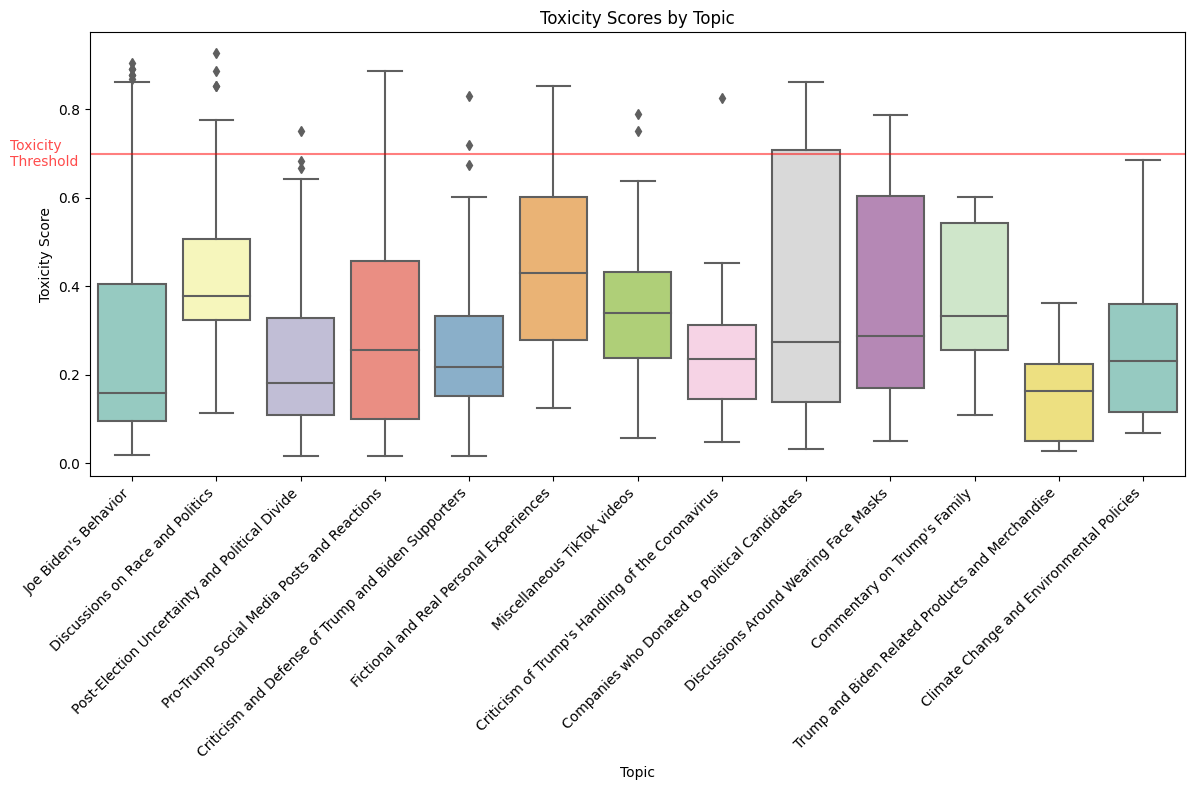

In [88]:
# Set font size
plt.rcParams.update({'font.size': 10})

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(x=topic_data['Topic'], y=topic_data['Toxicity Score'], palette='Set3')

# Set x-axis labels and rotation
plt.xticks(range(len(topic_labels)), [topic_labels[i] for i in range(len(topic_labels))], rotation=45, ha='right')

# Add a red horizontal line at 0.7
plt.axhline(y=0.7, color='red', alpha=0.5)

# Add text label for the toxicity threshold
plt.text(-1.45, 0.6725, 'Toxicity\nThreshold', color='red', alpha=0.7, fontsize=10)

plt.xlabel('Topic')
plt.ylabel('Toxicity Score')
plt.title('Toxicity Scores by Topic')
plt.tight_layout()
plt.show()

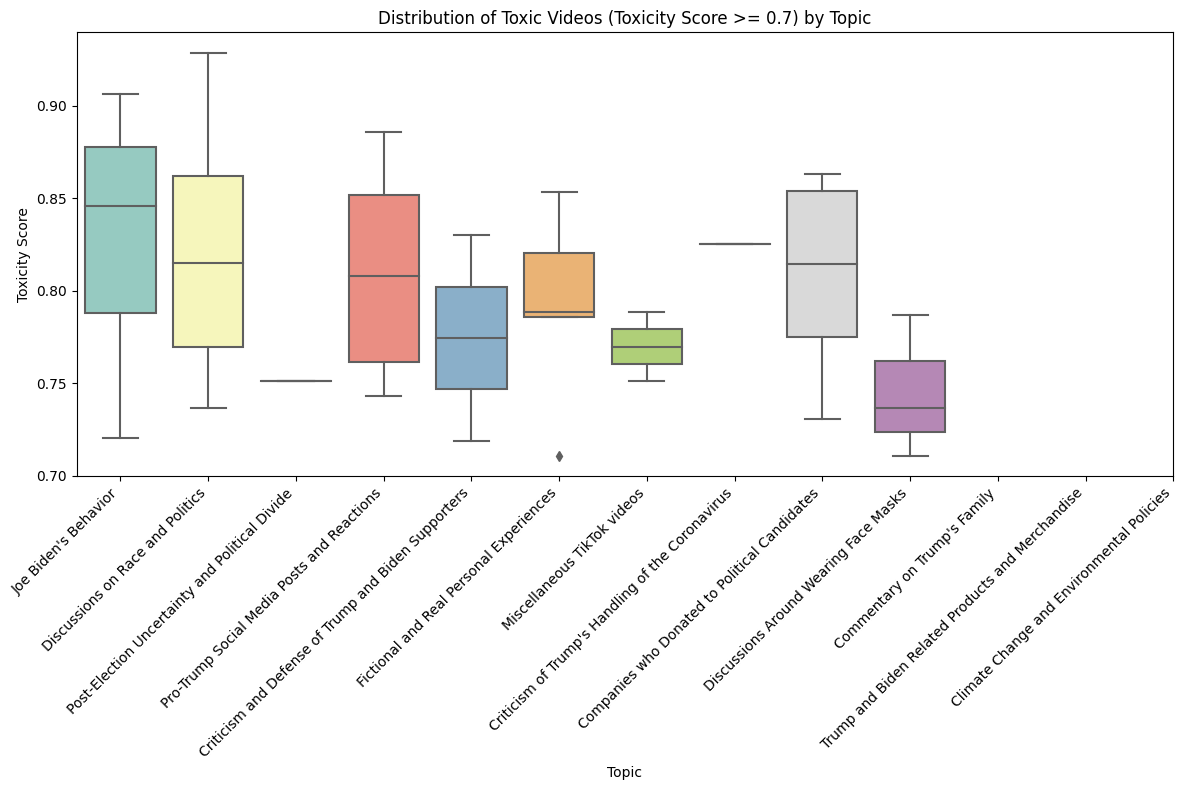

In [128]:
# Filter the topic_data DataFrame to include only toxic videos (toxicity score >= 0.7)
toxic_topic_data = topic_data[topic_data['Toxicity Score'] >= 0.7]

# Set font size
plt.rcParams.update({'font.size': 10})

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a boxplot for the filtered data
sns.boxplot(x=toxic_topic_data['Topic'], y=toxic_topic_data['Toxicity Score'], palette='Set3')

# Set x-axis labels and rotation
plt.xticks(range(len(topic_labels)), [topic_labels[i] for i in range(len(topic_labels))], rotation=45, ha='right')

plt.xlabel('Topic')
plt.ylabel('Toxicity Score')
plt.title('Distribution of Toxic Videos (Toxicity Score >= 0.7) by Topic')
plt.tight_layout()
plt.show()


In [131]:
topic_model.get_topic_info(0)

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,0,168,0_biden_biden2020_vote_joe,Joe Biden's Behavior,"[biden, biden2020, vote, joe, trump, fyp, joe ...",[joe biden has had some creepy moments wit wom...


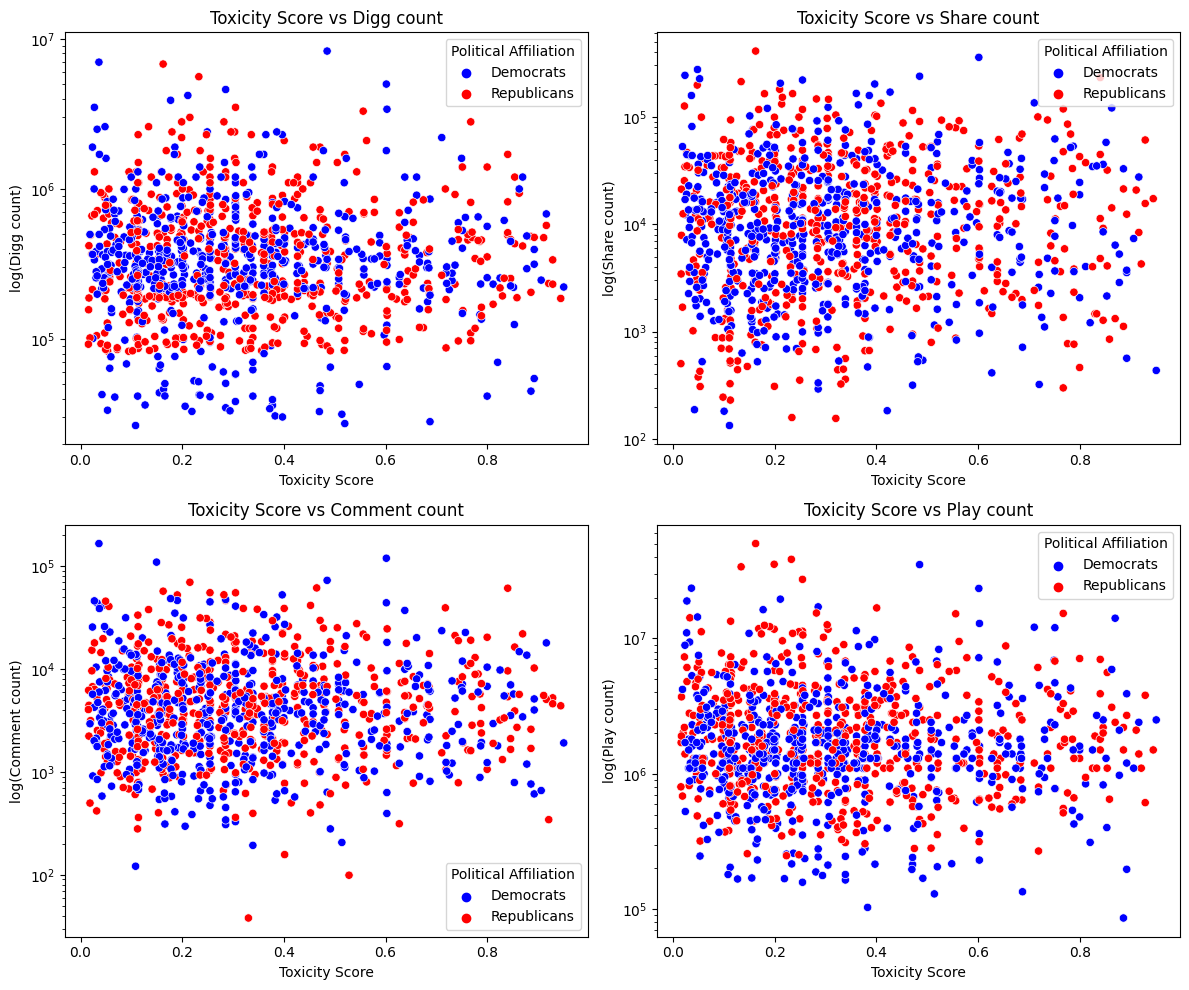

In [230]:
# Create a copy of the data
data_modified = data.copy()

# Combine search tags
data_modified.loc[data_modified['search_tag'].isin(['joebiden', 'democrats', 'biden2020']), 'search_tag'] = 'Democrats'
data_modified.loc[data_modified['search_tag'].isin(['maga', 'trump2020', 'trump']), 'search_tag'] = 'Republicans'

# Select the relevant columns for analysis
metrics = ['digg_count', 'share_count', 'comment_count', 'play_count']

# Create a 2x2 grid for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over the metrics and plot them in the grid
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    scatter_plot = sns.scatterplot(data=data_modified, x='toxicity', y=metric, hue='search_tag', palette=['blue', 'red'], ax=axes[row, col])
    scatter_plot.set(xlabel='Toxicity Score', ylabel=f"log({metric.replace('_', ' ').capitalize()})")
    scatter_plot.set_title(f"Toxicity Score vs {metric.capitalize().replace('_', ' ')}")
    scatter_plot.set_yscale('log')

    # Move the legend to the best position
    scatter_plot.legend(title='Political Affiliation', loc='best')

plt.tight_layout()
plt.show()

In [195]:
# Calculate correlation coefficients
correlation_matrix = data[['toxicity', 'digg_count', 'share_count', 'comment_count', 'play_count']].corr()

# Display the correlation matrix
print(correlation_matrix)


               toxicity  digg_count  share_count  comment_count  play_count
toxicity       1.000000   -0.011433     0.005733      -0.014620   -0.037202
digg_count    -0.011433    1.000000     0.666257       0.707213    0.884062
share_count    0.005733    0.666257     1.000000       0.623741    0.649843
comment_count -0.014620    0.707213     0.623741       1.000000    0.604619
play_count    -0.037202    0.884062     0.649843       0.604619    1.000000


In [231]:
# Calculate correlation coefficients using log values
log_data = data.copy()
log_data[['digg_count', 'share_count', 'comment_count', 'play_count']] = np.log(data[['digg_count', 'share_count', 'comment_count', 'play_count']])
correlation_matrix_log = log_data[['toxicity', 'digg_count', 'share_count', 'comment_count', 'play_count']].corr()

# Display the correlation matrix with log values
print(correlation_matrix_log)

               toxicity  digg_count  share_count  comment_count  play_count
toxicity       1.000000    0.005742     0.018965       0.009199   -0.036000
digg_count     0.005742    1.000000     0.615418       0.705162    0.902196
share_count    0.018965    0.615418     1.000000       0.630824    0.603354
comment_count  0.009199    0.705162     0.630824       1.000000    0.672880
play_count    -0.036000    0.902196     0.603354       0.672880    1.000000


c:\Users\snell\anaconda3\envs\thesis_env\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

divide by zero encountered in log

